# Scientific Programming with Python 
## Assignment 1 - 2023W

**Associate Prof. Dr. Sascha Hunold** \
Research Group for Parallel Computing \
Faculty of Informatics \
TU Wien

## General comments

- Write the solution (the code) for each task directly in the cell below each task.

In [1]:
# this is just for making sure that plots will be inserted inline
import matplotlib.pyplot as plt
%matplotlib inline

# we need this for Task 3
from ipywidgets import interact, fixed
import ipywidgets as widgets
import numpy as np

## Task 1 (10 points) - Plot Polynomials with ``interact``

Your task is to plot an arbitrary function of the form $$f(x)=c_1*x^m+c_2*x^{m-1}+\ldots+c_{m}*x+c_{m+1}$$ in the interval **[-5,5]** **dynamically** (the number of summands may change).

Use the interact controls for Jupyter and Python. See https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html for examples.

Your task is to implement the function
```
def make_interactive_plot(eq):
```
which takes a string with an equation as an input and should return a set of widgets and an interactive plot.

## Rules
- For each of the coefficients, provide an `IntSlider` with values in $$\{0,1,2,\ldots,10\},$$ where the default value is 2. The sliders should be labelled (cf., `description`) with the name of the coefficient.
- Coefficients in equations are either of form `c+INT` (such as `c1`, `c121`, etc.) or could be represented by a letter from the English alphabet (`a`, `b`, ..., `z`).
- Whitespaces in the equations between different expressions are allowed, e.g., the following equations are all legal (this is not an exhaustive list):
  - `a*x**2+b*x+c`
  - `a * x**2+b*x+c`
  - `a * x**2 + b*x+c`
  - `a * x**2 + b*x + c`
  
## Hints
- Equations can be evaluated using the `eval` function, e.g., you may use `eval(c1*x + c2)`.
- `interact` provides the `interactive_output` function, which you can call with a dynamic list of arguments (the `IntSlider`s).

## Example

A call to
```
make_interactive_plot("c1 * x**3 + c2 * x**2 + c3 * x + c4")
```
should produce the following widgets and plot:
![Example Plot](./shared/191.125-2023W/assignment1/dynamic_interact.png) 

arguments to fun: {'c1': 10, 'c2': 1}
x [-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
y [41.         25.19753086 13.34567901  5.44444444  1.49382716  1.49382716
  5.44444444 13.34567901 25.19753086 41.        ]


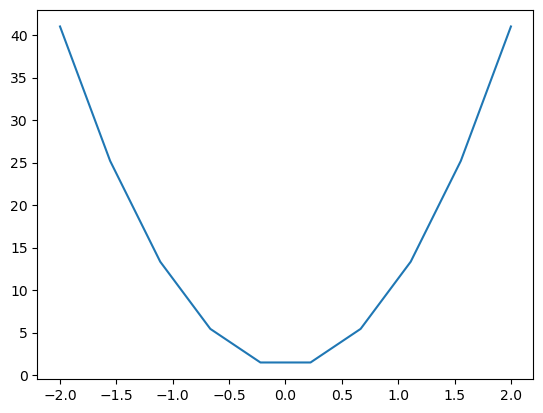

In [2]:
# This sample code should help you with this task.

# Of course, you can solve the task differently. But this code snippet might come in handy.
def fun(equation, args):
    print("arguments to fun:", args)

    x = np.linspace(-2,2,10)
    args["x"] = x    
    # now, we evaluate the "equation"
    # we basically execute this Python code snippet
    # args provides the values for c1, c2, and x
    y = eval(equation, args)

    print("x", x)
    print("y", y)
    fig = plt.figure()
    plt.plot(x,y)
    plt.show()


# I would like to pass a few variables to function 'fun'
# I put them in a dictionary
# the goal is to execute the polynomial function
myargs = {
    "c1" : 10,
    "c2" : 1
}    
fun("c1 * x**2 + c2", myargs)

In [3]:
import string
def make_interactive_plot(eq):

    coef_final = []
    import string
    eq = eq.lower()

    # Remove punctuations
    coef = ''.join([char for char in eq if char not in string.punctuation])
    # Split the Coefficients
    coef1 = coef.split('x')
    # Clean the Coefficients
    nums = tuple((str(char) for char in range(10)))
    for i in coef1:
        if i.startswith(nums):
            coef_final.append(i[1:])
        else:
            coef_final.append(i)
            
    # Remove Whitespaces
    coef_final1 = [item.strip() for item in coef_final]

    # Create Integer Slider
    params = {char: widgets.IntSlider(min=0, max=10, step=1, value=2) for char in coef_final1}

    
    def fun(**kwargs):

        x = np.linspace(-5, 5, 1000)
        kwargs = {key:value.value for key, value in params.items()}
        kwargs["x"] = x    
        y = eval(eq, kwargs)
        fig = plt.figure()
        plt.plot(x,y)
        plt.show()

    # params = {char: widgets.IntSlider(min=0, max=10, step=1, value=2) for char in coef_final1}
    interact(fun, **params) 

#make_interactive_plot("c1*x**3+c2*x**2+c3*x+c4")
make_interactive_plot("a*x**3+b*x**2+c*x+d")
#make_interactive_plot("c1 * x**3 + c2 * x**2 + c3 * x + c4")

interactive(children=(IntSlider(value=2, description='a', max=10), IntSlider(value=2, description='b', max=10)…

## Task 2 (10 points) - Plot Tube Lines of Vienna

Now, you will plot the city map of Vienna and the routes of the Viennese subway lines. We provide the following code that reads and draws the polygons of the individual districts of Vienna. 

We also provide a CSV file containing information about means of public transportion in Vienna from https://www.data.gv.at (Katalog Öffentliches Verkehrsnetz Linien Wien). 

## Rules

Your need to read the file that contains the coordinates of the subway lines of Vienna, which can be found in `./shared/191.125-2023W/assignment1/OEFFLINIENOGD.csv`. 
The column `LBEZEICHNUNG` in this file contains a label denoting the actual line, e.g., `U1`, `U2`, etc.
In column `SHAPE`, you can find a list of tuples of `x` and `y` coordinates for different subway segments. It means that there are (for example) several segments of the subway line `U1`. Read the coordinates of all segments of every subway line. Then, plot the route of each segments for each subway line. Make sure that you plot segment by segment.

Your solution has to work for the subway lines with the additional subway lines U1, U2, U3, U4, and U6, e.g., `plot_tube_line(csv_file, "U2")` must work.

In addition, your code should also work for an arbitrarily called subway line, which could be called "UX" or "UY" or even "U10".  
We have a modified CSV file with artificially created subway lines. We will run your code with this file as well.

You must make sure your solution works for any csv file with the same formatting as `./shared/assignment1/OEFFLINIENOGD.csv`.
We will deduct points if the code contains hardcoded subway lines or segment coordinates.

In your code, you should retrieve the color for a tube line by calling the function `get_subway_color(subway_line)`, where `subway_line` denotes the name of the subway.

## Additional Comments
- The CSV file also contains data of other means of transportation (bus, tram). You can ignore these data.

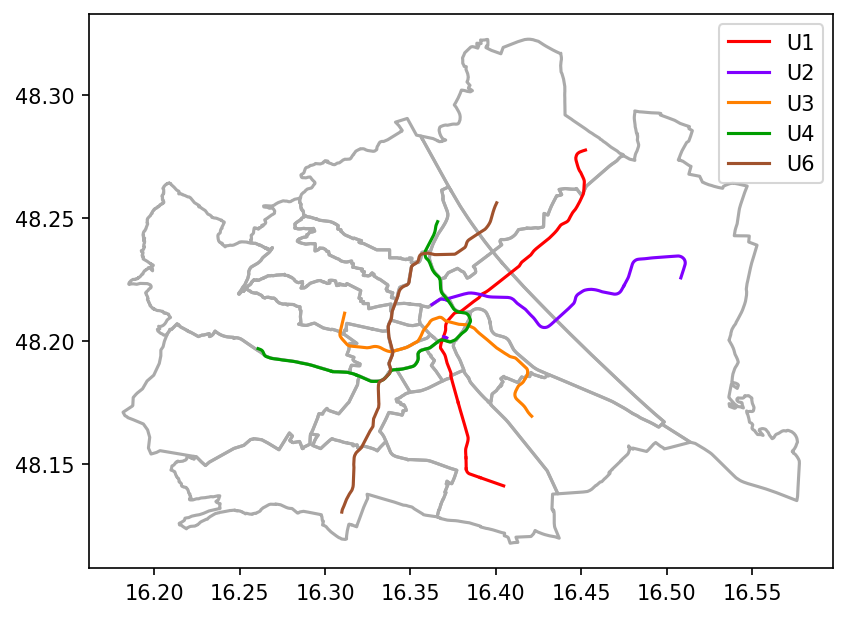

In [5]:
# In order to run the code, it is necessary to install these packages!
# !pip install pyshp
# !pip install matplotlib
# !pip install pandas
# !pip install shapely

import shapefile as shp
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString

def plot_vienna_map():
    sf = shp.Reader("./shared/191.125-2023W/assignment1/vienna/BEZIRKSGRENZEOGDPolygon.shp", encoding="latin1")

    plt.figure(dpi=150)

    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, '-', color='#aaaaaa')


def get_subway_color(subway_line):
    u2col = {
        "U1": '#ff0000',
        "U2": '#8000ff',
        "U3": '#ff8000',
        "U4": '#009d00',
        "U6": '#A0522D'
    }

    col = '#540CF2'  # default

    if subway_line in u2col:
        col = u2col[subway_line]

    return col


def plot_tube_line(csv_file, subway_line):
    df = pd.read_csv(csv_file)
    # Filter rows based on subway_line
    selected_rows = df[df['LBEZEICHNUNG'].str.startswith(subway_line)]
    flag = True
    # Use the same figure for all subway lines
    for _, row in selected_rows.iterrows():
        shape_str = row['SHAPE']
        # Extract coordinates from shape string
        coordinates = LineString([map(float, coord.split()) for coord in shape_str[12:-1].split(',')])
        x, y = coordinates.xy
        plt.plot(x, y, '-', color=get_subway_color(subway_line), label=subway_line if flag else '')
        flag = False
        
# Plot Vienna map
plot_vienna_map()

# Test code for each subway line
csv_file = "./shared/191.125-2023W/assignment1/OEFFLINIENOGD.csv"
plot_tube_line(csv_file, "U1")
plot_tube_line(csv_file, "U2")
plot_tube_line(csv_file, "U3")
plot_tube_line(csv_file, "U4")
plot_tube_line(csv_file, "U6")

# Add a single legend for all subway lines
plt.legend()

# Display the plot
plt.show()

# Task 3 (3+3 points) - Intersection of Two Lists of Lists

In this task, you will efficiently compute the intersection of two lists.

## Input

You are given the function `read_points(csv_file)`, which reads in student data from a `csv_file`, where each line represents one student.  This function `read_points` returns a list of lists, where each element in the outer list represents a student data item. 
A student is characterized by a list with the following entries `[ID, first name, last name, points]`.

For example, the first five entries of a CSV file may look like this:
```
[['3594', 'Robert', 'Davey', '12'], ['5055', 'Ştefan', 'Lichtenstein', '88'], ['2932', 'Oswald', 'Conner', '91'], ['906', 'Fareed', 'Deacon', '33'], ['461', 'Roman', 'Castillo', '10']]
```
In this case, 'Robert Davey' has student ID `3594` and has gotten `12` points (in some imaginary exam).

Now, you are given two datasets `data1` and `data2`, and each of these datasets stores the points that a student has obained in exam1 and exam2, respectively.

## Output

The function `intersect(list_of_names1, list_of_names2)` should return the itersection of `list_of_names1` and `list_of_names2` by `ID`. Thus, for each `ID` in `list_of_names1` that is also found in `list_of_names2`, the resulting list should contain `[ID, first name, last name, points1, points2]`, where `points1` denotes the points from `data1` and `points2` denotes the points from `data2`.

## Rules

- Ensure that `data1` and `data2` must not be altered during the merge operation, i.e., the elements before and after the operation must be identical.
- You must not use any external libraries that provide this functionality (such as `pandas`). You are supposed to solve this task with Standard Python.

## Example

Let `data1` contain the following data:
```
[['3594', 'Robert', 'Davey', '12'], ['5055', 'Ştefan', 'Lichtenstein', '88']]
```
and `data2` contains 
```
[['3594', 'Robert', 'Davey', '20'], ['461', 'Roman', 'Castillo', '10']]
```
the resulting output list should look like this
```
[['3594', 'Robert', 'Davey', '12', '20']]
```

## Points
- You will earn 3 points if your function `intersect` returns the correct answer.
- You will earn the remaining 3 points of your function `intersect` runs in less than 0.5 second on the JupyterHub server.

## Aditional Notes

The names listed in `./shared/191.125-2023W/assignment1/p{1|2}_data.csv` are entirely fictional and randomly generated from dataset found under the following URL: https://www.opendataportal.at/katalog/dataset/0303f8aa-dc89-48a0-9f82-b58e29780449#resources

In [71]:

def intersect(list_of_names1: list[list],
              list_of_names2: list[list]
             ) -> list[list]:
    """
    Find Intersection of datasets

    :param list_of_names1: Input list 1
    :param list_of_names2: Input list 2
    :return: Intersection of two input lists
    
    """
    # Create dictionaries from lists
    dict1 = {x[0]:x[1:] for x in list_of_names1}
    dict2 = {x[0]:x[1:] for x in list_of_names2}  

    # Find intersection of dictionaries
    intersect = {
        key:values for key, values in dict1.items() if key in dict2
    }

    # Add values of second dataset
    for key, value in intersect.items():
        value.append(dict2[key][-1])

    # Convert to list
    list_of_intersects = []
    for k, v in intersect.items():
        _= [k] + v
        list_of_intersects.append(_)
    return list_of_intersects


def read_points(csv_file):
    data = []
    with open(csv_file) as fh:
        content = fh.readlines()
        # skip header line
        for i in range(1,len(content)):
            line = content[i].strip()
            items = line.split(";")
            data.append( items )
    return data


data1 = read_points("./shared/191.125-2023W/assignment1/p1_data.csv")
data2 = read_points("./shared/191.125-2023W/assignment1/p2_data.csv")

print("first 10 persons in data1")
print(data1[0:10])

print("number of persons on data1: %d" % (len(data1)))
print("number of persons on data2: %d" % (len(data2)))

%time dataj = intersect(data1, data2)
print("number of persons on data_joined: %d" % (len(dataj)))
print("first 10 persons in data_joined")
print(dataj[0:10])

first 10 persons in data1
[['11309', 'Stefan', 'Krieg', '12'], ['3594', 'Robert', 'Davey', '12'], ['5055', 'Ştefan', 'Lichtenstein', '88'], ['2932', 'Oswald', 'Conner', '91'], ['906', 'Fareed', 'Deacon', '33'], ['461', 'Roman', 'Castillo', '10'], ['6830', 'Mirjam', 'McLean', '2'], ['6763', 'Florentina', 'Shiomi', '73'], ['14207', 'Mirjam', 'Sandner', '27'], ['2856', 'Philippe', 'Urteil', '84']]
number of persons on data1: 9000
number of persons on data2: 10500
CPU times: user 16.4 ms, sys: 292 µs, total: 16.7 ms
Wall time: 16.7 ms
number of persons on data_joined: 6257
first 10 persons in data_joined
[['11309', 'Stefan', 'Krieg', '12', '58'], ['3594', 'Robert', 'Davey', '12', '83'], ['5055', 'Ştefan', 'Lichtenstein', '88', '55'], ['906', 'Fareed', 'Deacon', '33', '48'], ['461', 'Roman', 'Castillo', '10', '55'], ['6830', 'Mirjam', 'McLean', '2', '79'], ['6763', 'Florentina', 'Shiomi', '73', '20'], ['14207', 'Mirjam', 'Sandner', '27', '89'], ['10888', 'Ferdinand', 'Alechinsky', '58', '82

# Task 4 (6 points) - Process PDB files

The RCSB Protein Data Base (PDB) (https://www.rcsb.org/) holds a large collection of molecular structures that can be used for various scientific purpose. The compounds found in this database can be downloaded in different file formats, e.g., `.pdb` or `.cif`.

In this exercise, we will focus on `.cif` files. These cif-files contain one section where the location of all atoms is defined, and these definitions start with the keyword "ATOM". For example, in our test case, the first atom is defined as follows:
```
ATOM   1    N  N   . LYS A 1 1   ? 3.195   10.133 9.817  1.00 5.98  ? 1    LYS A N   1
```
In this example, the atom with ID 1 is a nitrogen atom and is located at the coordinate (3.195, 10.133, 9.817).

## Goal / Rules
The goal is to complete the function 
```
    function_get_distances(cif_file_name, ref_atom_id, max_nb_atoms)
```

The function should compute the distance of all atoms found in `cif_file_name` to the atom with id `ref_atom_id`.
The function should return the atom ids and their distances to `ref_atom_id`, but only the closest `max_nb_atoms` should be returned.

In this exercise, you can use any external library. 
Note that we have completed this task by simply parsing the cif file using standard Python functionality. 
However, you are free to use another library. 
But if you do, you need to add the installation procedure into the Jupyter notebook, e.g.,

```
!pip install EXTERNAL_LIBRARY
```
The notebook should be runnable on the provided JupyterHub installation without additional modifications. What we cannot execute will not be graded.

## Input

The function `function_get_distances` takes as inputs 
- the name (path) of a cif file (`cif_file_name`) 
- an `ref_atom_id`, and
- the `max_nb_atoms`, which returns the maximum number of atoms returned by the functions. The value of `max_nb_atoms` is always defined and strictly larger than 0.

## Output

The function `function_get_distances` should return a list of tuples, where each tuple is composed of an atom id and the distance, e.g., `(3, 2.34)`.

- The function should not compute the distance of `ref_atom_id` to itself.
- The distance values should be **rounded to only two decimals**.
- The list of tuples must be **sorted by increasing distance** (ties are broken by atom ID, smaller atom IDs come first).
- The list contains at most `max_nb_atoms` atoms.

## Example Output
This example only contains fantasy values, but it shows the general structure of a solution.
```
[ (4, 1.23), (2, 5.12), (3, 9.34) ]
```

In [ ]:
# we do some preprocessing here, you can ignore this


In [86]:
import math

def function_get_distances(cif_file_name, ref_atom_id, max_nb_atoms):
    # Read the contents of the cif file
    with open(cif_file_name, 'r') as file:
        cif_data = file.readlines()

    # Initialize a list to store atom distances
    atom_distances = []

    # Loop through each line in the cif file
    for line in cif_data:
        # Check if the line starts with "ATOM" and contains atom information
        if line.startswith("ATOM"):
            # Extract atom information
            atom_id = int(line[7:11].strip())
            x, y, z = float(line[34:41].strip()), float(line[42:49].strip()), float(line[49:56].strip())

            # Check if the atom is not the reference atom
            if atom_id != ref_atom_id:
                # Calculate the distance to the reference atom
                distance = round(math.sqrt((x)**2 + (y)**2 + (z)**2), 2)

                # Append the atom id and distance to the list
                atom_distances.append((atom_id, distance))

    # Sort the list by increasing distance and atom ID
    sorted_atom_distances = sorted(atom_distances, key=lambda x: (x[1], x[0]))

    # Return at most max_nb_atoms atoms
    return sorted_atom_distances[:max_nb_atoms]

# Example usage:
print(function_get_distances("./shared/191.125-2023W/assignment1/1GWD.cif", 1, 10))
print(function_get_distances("./shared/191.125-2023W/assignment1/1GWD.cif", 1, 5))

[(9, 13.03), (6, 13.33), (8, 13.33), (7, 13.36), (669, 13.47), (668, 13.57), (5, 13.68), (2, 13.79), (56, 13.99), (13, 14.54)]
[(9, 13.03), (6, 13.33), (8, 13.33), (7, 13.36), (669, 13.47)]
